# <center> Neural Network to guess handwritten digits </center>

#### Zeeshan Jafri

Neural Network implemented using Keras Library

originally made for CP322 assignment 3

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

digits = pd.read_csv("train.csv")
digitsTest = pd.read_csv("test_nolabel.csv")

digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


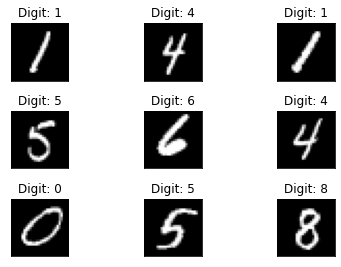

In [14]:
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i].reshape(28,-1),cmap="gray")
    plt.title("Digit: {}".format(trainLabels_raw[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

In [15]:
# The size of the data
train.shape, trainLabels_raw.shape, test.shape

((6000, 784), (6000,), (1000, 784))

In [37]:
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.to_categorical(trainLabels_raw,num_categories)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (28,28,1)
))

#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(4,4),activation="relu")) # add convolution layer : 32 layers, 4 x 4

model.add(MaxPooling2D(pool_size=(2,2))) # add max pooling layer : 2 x 2

model.add(Flatten())
model.add(Dense(num_categories, activation = "softmax"))

#Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
batch_size = 128
num_epoch = 3
model_log = model.fit(train.reshape(-1,28,28,1), trainLabels,
          batch_size=batch_size,
          epochs=num_epoch,
            verbose=1,
            validation_split=.05
          )

## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))
np.savetxt("pred.csv", ypred, delimiter=",")

Train on 5700 samples, validate on 300 samples
Epoch 1/3
5700/5700 [==============================] - 2s 358us/step - loss: 1.0610 - acc: 0.6846 - val_loss: 0.4308 - val_acc: 0.8600
Epoch 2/3
5700/5700 [==============================] - 0s 78us/step - loss: 0.3085 - acc: 0.9070 - val_loss: 0.2215 - val_acc: 0.9233
Epoch 3/3
5700/5700 [==============================] - 0s 78us/step - loss: 0.1957 - acc: 0.9388 - val_loss: 0.1627 - val_acc: 0.9533


In [38]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == 1:
            ypred_num.append(i)

with open('pred.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)